# <center><b><h1>NeuralNetwork (First Run)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../../../Data/other_patients/X_train.csv", index_col=0)
df_X_train.shape

(170, 14)

In [3]:
df_y_train = pd.read_csv("../../../Data/other_patients/y_train.csv", index_col=0)
df_y_train.shape

(170, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/other_patients/X_val.csv", index_col=0)
df_X_val.shape

(20734, 14)

In [5]:
df_y_val = pd.read_csv("../../../Data/other_patients/y_val.csv", index_col=0)
df_y_val.shape

(20734, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

# 0.5 because auc below 0.5 is not good, i have to quote the paper

In [6]:
best_score_sl = actual_score = 0.5
best_i_sl = 0
for i in range(1,29,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.4717826176214858
I:  2 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.5
I:  3 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.4896311346729785
I:  4 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.5990212298328664
I:  5 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.5517597937397353
I:  6 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.5742636581006666
I:  7 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.49671982175635204
I:  8 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.4730038160564196
I:  9 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.5626479325669017
I:  10 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.49635904743503045
I:  11 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.5292966863105014
I:  12 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Score:  0.4934607767365472
I:  13 Best_I:  4 Best_Score:  0.5990212298328664 Actual_Sc

In [7]:
best_score_twol = actual_score = 0.5
best_i_twol = best_j_twol = 0
for i in range(1,29,1):
    for j in range(1,29,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
Best_I:  1 Best_J:  15 Best_Score:  0.5594024731909961 Actual_Score:  0.4352674258525746
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
Best_I:  2 Best_J:  10 Best_Score:  0.5946074050816346 Actual_Score:  0.5315217128779828
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I,J:  3 - 4
I,J:  3 - 5
I,J:  3 - 6
I,J:  3 - 7
I,J:  3 - 8
I,J:  3 - 9
I,J:

I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I,J:  19 - 18
I,J:  19 - 19
I,J:  19 - 20
I,J:  19 - 21
I,J:  19 - 22
I,J:  19 - 23
I,J:  19 - 24
I,J:  19 - 25
I,J:  19 - 26
I,J:  19 - 27
I,J:  19 - 28
Best_I:  16 Best_J:  23 Best_Score:  0.6221998478407883 Actual_Score:  0.5326055453579365
I,J:  20 - 1
I,J:  20 - 2
I,J:  20 - 3
I,J:  20 - 4
I,J:  20 - 5
I,J:  20 - 6
I,J:  20 - 7
I,J:  20 - 8
I,J:  20 - 9
I,J:  20 - 10
I,J:  20 - 11
I,J:  20 - 12
I,J:  20 - 13
I,J:  20 - 14
I,J:  20 - 15
I,J:  20 - 16
I,J:  20 - 17
I,J:  20 - 18
I,J:  20 - 19
I,J:  20 - 20
I,J:  20 - 21
I,J:  20 - 22
I,J:  20 - 23
I,J:  20 - 24
I,J:  20 - 25
I,J:  20 - 26
I,J:  20 - 27
I,J:  20 - 28
Best_I:  16 Best_J:  23 Best_Score:  0.6221998478407883 Actual_Score:  0.5394119529514056
I,J:  21 - 1
I,J:  21 - 2
I,J:  21 - 3
I,J:  21 - 4
I,

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.522995966573278 Actual_Score:  0.522995966573278
I:  2 Best_Random_State:  2 Best_Score:  0.571754842527292 Actual_Score:  0.571754842527292
I:  3 Best_Random_State:  2 Best_Score:  0.571754842527292 Actual_Score:  0.549103045599459
I:  4 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5955433049946864
I:  5 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5
I:  6 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5590266037097865
I:  7 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.494236667954787
I:  8 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.48578035938556663
I:  9 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5500917785721187
I:  10 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5634464665249734
I:  11 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.51

I:  88 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.4699198748913148
I:  89 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5601647787653367
I:  90 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5381122596850546
I:  91 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.506282605545358
I:  92 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5152415829388465
I:  93 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.499372041348662
I:  94 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5197037122017196
I:  95 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.5261342503139793
I:  96 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.51488684668148
I:  97 Best_Random_State:  4 Best_Score:  0.5955433049946864 Actual_Score:  0.4710988068785624
I:  98 Best_Random_State:  4 Best_Score:  0.5955433049

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.47003459810646314 Actual_Score:  0.47003459810646314
I:  2 Best_Random_State:  1 Best_Score:  0.47003459810646314 Actual_Score:  0.46303044391846204
I:  3 Best_Random_State:  3 Best_Score:  0.5008015529900492 Actual_Score:  0.5008015529900492
I:  4 Best_Random_State:  3 Best_Score:  0.5008015529900492 Actual_Score:  0.48186618442662543
I:  5 Best_Random_State:  5 Best_Score:  0.5232601318713168 Actual_Score:  0.5232601318713168
I:  6 Best_Random_State:  6 Best_Score:  0.5264437010916819 Actual_Score:  0.5264437010916819
I:  7 Best_Random_State:  7 Best_Score:  0.5910962708917012 Actual_Score:  0.5910962708917012
I:  8 Best_Random_State:  7 Best_Score:  0.5910962708917012 Actual_Score:  0.5141049173992851
I:  9 Best_Random_State:  7 Best_Score:  0.5910962708917012 Actual_Score:  0.5113289174958942
I:  10 Best_Random_State:  7 Best_Score:  0.5910962708917012 Actual_Score:  0.5060154212153415
I:  11 Best_Random_State:  7 Best_Score:  0.5910962708

I:  87 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.48080348517051497
I:  88 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.4920101318713168
I:  89 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5752312578494831
I:  90 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5494381581489711
I:  91 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5343928122886678
I:  92 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.49751533668244613
I:  93 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5313481185392716
I:  94 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5122497222490581
I:  95 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5705925152159211
I:  96 Best_Random_State:  15 Best_Score:  0.6523433726210028 Actual_Score:  0.5444627934499082
I:  97 Best_Random_State:  15 Best_Sco

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "One Layer"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  22
For the layer  2  the best number of neurons is :  6


### 4.1 Confusion Matrix and Classification Report

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[12777  7925]
 [   10    22]]


In [12]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       1.00      0.62      0.76     20702
    Fracture       0.00      0.69      0.01        32

   micro avg       0.62      0.62      0.62     20734
   macro avg       0.50      0.65      0.38     20734
weighted avg       1.00      0.62      0.76     20734



### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.6172952638178837


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.6875


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.3827047361821163


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

0.6171867452420056


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.3828132547579944
0.38281325475799444


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

0.002768340254183969


## 5. Metrics visualization

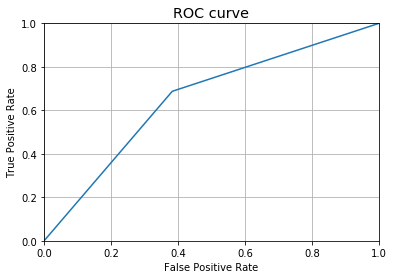

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Creation new dataframe

In [20]:
mod_df = pd.DataFrame(df_X_val)

In [21]:
mod_df.head()

,sex,age,weight,height,HIPX,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous
151148,0.971362,0.152632,0.752603,0.302016,-0.037838,-0.808640,-0.08895,-0.134216,-0.788571,-0.065796,0.461866,0.675763,-0.489919,0.386715
128052,0.971362,0.773403,1.128764,0.628398,-0.037838,0.760768,-0.08895,-0.134216,-0.788571,0.253356,2.680617,1.499506,-0.487428,0.016451
43725,-1.029482,-1.709681,-0.560774,-1.003510,-0.037838,-0.808640,-0.08895,-0.134216,-0.529478,1.174545,-0.243927,-0.415141,-0.387815,0.016451
52850,-1.029482,-1.461373,-0.190988,0.410810,-0.037838,-0.808640,-0.08895,-0.134216,0.235899,0.006738,-0.241298,-0.103454,-0.499880,-0.446379
100827,0.971362,-0.219831,1.294530,0.737192,-0.037838,-0.808640,-0.08895,-0.134216,0.998072,-0.704101,-1.447610,0.208233,-0.088975,0.756979


In [22]:
mod_df['real_class'] = df_y_val
mod_df['predicted_class'] = predictions

In [23]:
mod_df.head()

,sex,age,weight,height,HIPX,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous,real_class,predicted_class
151148,0.971362,0.152632,0.752603,0.302016,-0.037838,-0.808640,-0.08895,-0.134216,-0.788571,-0.065796,0.461866,0.675763,-0.489919,0.386715,0,0
128052,0.971362,0.773403,1.128764,0.628398,-0.037838,0.760768,-0.08895,-0.134216,-0.788571,0.253356,2.680617,1.499506,-0.487428,0.016451,0,1
43725,-1.029482,-1.709681,-0.560774,-1.003510,-0.037838,-0.808640,-0.08895,-0.134216,-0.529478,1.174545,-0.243927,-0.415141,-0.387815,0.016451,0,0
52850,-1.029482,-1.461373,-0.190988,0.410810,-0.037838,-0.808640,-0.08895,-0.134216,0.235899,0.006738,-0.241298,-0.103454,-0.499880,-0.446379,0,1
100827,0.971362,-0.219831,1.294530,0.737192,-0.037838,-0.808640,-0.08895,-0.134216,0.998072,-0.704101,-1.447610,0.208233,-0.088975,0.756979,0,0


In [24]:
mod_df_complete = mod_df[(mod_df['real_class'] == 0) & ( mod_df['predicted_class']==1)]

In [25]:
mod_df_complete['Class'] = mod_df['real_class']
mod_df_complete = mod_df_complete.drop(['real_class','predicted_class'],axis=1)
mod_df_complete.shape

/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(7925, 15)

In [26]:
std_patients = pd.read_csv('../../../Data/standardized_patients.csv', index_col=0)
std_patients.drop(columns=['menopause','HRT'], axis=1, inplace=True)
std_patients.shape

(153884, 15)

for index in mod_df_complete.index.values:
    feature_to_check = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for check in feature_to_check:
        if not check:
            print(index, feature_to_check)

In [27]:
for index in mod_df_complete.index.values:
    equals = True
    patient = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for feature in patient:
        if not feature:
            equals = False
            print(std_patients.loc[index].round(10) == giorgiONE.loc[index].round(10), index)
    if equals:
        std_patients.loc[index,'Class'] = 1        
    

In [28]:
std_patients.loc[mod_df_complete.index.values,'Class'].shape

(7925,)

In [29]:
std_patients.to_csv('../../../Data/other_patients/new_std_patients.csv')

## 7. Save the model

In [30]:
joblib.dump(mlp, 'NeuralNetwork - Other_Patients - First Run - Base Ratio 1.pkl') 

['NeuralNetwork - Other_Patients - First Run - Base Ratio 1.pkl']